In [2]:
# quick test if the GPU is available ;) 
import tensorflow as tf 

print('Num GPUS Available:', len(tf.config.list_physical_devices('GPU')))

from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# loadding the data
import numpy as np 
import pandas as pd

Num GPUS Available: 1


In [3]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    x = range(1, len(acc) + 1) #200 1--200
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and Validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show() 

In [4]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [5]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [6]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
# co
training = pd.read_csv('./tdata/co_training.csv')
test = pd.read_csv('./tdata/co_test.csv')
dev = pd.read_csv('./tdata/co_dev.csv')

[1]
[324 325 326 327 328 329   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]
150
300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 

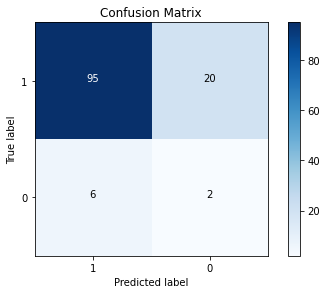

In [11]:
X_training = training.text.values
X_test = test.text.values
X_dev = dev.text.values

y_training = training.label.values
y_test = test.label.values
y_dev = dev.label.values

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_training)

X_train = tokenizer.texts_to_sequences(X_training)
X_test = tokenizer.texts_to_sequences(X_test)
X_dev = tokenizer.texts_to_sequences(X_dev)

vocab_size = len(tokenizer.word_index) + 1
print(X_train[2])

maxlen = 150
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_dev = pad_sequences(X_dev, padding='post', maxlen=maxlen)
print(X_train[0])


print(len(X_train[0]))


dict_item = tokenizer.word_index.items()
first_ele = list(dict_item)[0]

embedding_dim = 300
embedding_matrix = create_embedding_matrix('./wordembedding/sgns.sogou.char', tokenizer.word_index, embedding_dim)

print(len(embedding_matrix[0]))
print(embedding_matrix[0])


model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                          input_length=maxlen, trainable=False))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_training,
                    epochs=30,
                    validation_data=(X_dev, y_dev),
                    verbose=False,
                    batch_size=256)


# evalate in test dataset
loss, accuracy = model.evaluate(X_test, y_test)
print('loss: {}, accuracy: {}'.format(loss, accuracy))


predictions = model.predict(x=X_test, batch_size=256, verbose=0)
rounded_predictions = np.argmax(predictions, axis=1)
# make sure argmax worked
for index, i in enumerate(rounded_predictions):
    if i > 1:
        rounded_predictions[index] = [1]
        
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)
cm_plot_labels = ['1','0']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [12]:
# en
training = pd.read_csv('./tdata/en_training.csv')
test = pd.read_csv('./tdata/en_test.csv')
dev = pd.read_csv('./tdata/en_dev.csv')

[473, 9, 9]
[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
150
300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0

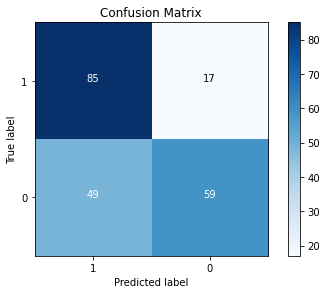

In [13]:
X_training = training.text.values
X_test = test.text.values
X_dev = dev.text.values

y_training = training.label.values
y_test = test.label.values
y_dev = dev.label.values

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_training)

X_train = tokenizer.texts_to_sequences(X_training)
X_test = tokenizer.texts_to_sequences(X_test)
X_dev = tokenizer.texts_to_sequences(X_dev)

vocab_size = len(tokenizer.word_index) + 1
print(X_train[2])

maxlen = 150
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_dev = pad_sequences(X_dev, padding='post', maxlen=maxlen)
print(X_train[0])


print(len(X_train[0]))


dict_item = tokenizer.word_index.items()
first_ele = list(dict_item)[0]

embedding_dim = 300
embedding_matrix = create_embedding_matrix('./wordembedding/sgns.sogou.char', tokenizer.word_index, embedding_dim)

print(len(embedding_matrix[0]))
print(embedding_matrix[0])


model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                          input_length=maxlen, trainable=False))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_training,
                    epochs=30,
                    validation_data=(X_dev, y_dev),
                    verbose=False,
                    batch_size=256)


# evalate in test dataset
loss, accuracy = model.evaluate(X_test, y_test)
print('loss: {}, accuracy: {}'.format(loss, accuracy))


predictions = model.predict(x=X_test, batch_size=256, verbose=0)
rounded_predictions = np.argmax(predictions, axis=1)
# make sure argmax worked
for index, i in enumerate(rounded_predictions):
    if i > 1:
        rounded_predictions[index] = [1]
        
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)
cm_plot_labels = ['1','0']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [14]:
# so
training = pd.read_csv('./tdata/so_training.csv')
test = pd.read_csv('./tdata/so_test.csv')
dev = pd.read_csv('./tdata/so_dev.csv')

[1068, 1069, 1070, 3, 1, 2, 1071]
[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
150
300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

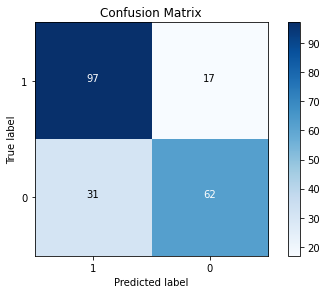

In [15]:
X_training = training.text.values
X_test = test.text.values
X_dev = dev.text.values

y_training = training.label.values
y_test = test.label.values
y_dev = dev.label.values

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_training)

X_train = tokenizer.texts_to_sequences(X_training)
X_test = tokenizer.texts_to_sequences(X_test)
X_dev = tokenizer.texts_to_sequences(X_dev)

vocab_size = len(tokenizer.word_index) + 1
print(X_train[2])

maxlen = 150
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_dev = pad_sequences(X_dev, padding='post', maxlen=maxlen)
print(X_train[0])


print(len(X_train[0]))


dict_item = tokenizer.word_index.items()
first_ele = list(dict_item)[0]

embedding_dim = 300
embedding_matrix = create_embedding_matrix('./wordembedding/sgns.sogou.char', tokenizer.word_index, embedding_dim)

print(len(embedding_matrix[0]))
print(embedding_matrix[0])


model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                          input_length=maxlen, trainable=False))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_training,
                    epochs=30,
                    validation_data=(X_dev, y_dev),
                    verbose=False,
                    batch_size=256)


# evalate in test dataset
loss, accuracy = model.evaluate(X_test, y_test)
print('loss: {}, accuracy: {}'.format(loss, accuracy))


predictions = model.predict(x=X_test, batch_size=256, verbose=0)
rounded_predictions = np.argmax(predictions, axis=1)
# make sure argmax worked
for index, i in enumerate(rounded_predictions):
    if i > 1:
        rounded_predictions[index] = [1]
        
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)
cm_plot_labels = ['1','0']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')